# Course 5 Task 3 - Credit One Classification
### Andrew Janzen
### August 26, 2019

### Objectives:
* Apply classification modeling to dataset
* Consolidate findings to final report

In [1]:
#Imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#Import dataset processed in Course 5 Task 2
pcf = pd.read_csv('prepped_credit_file.csv', header =0)

In [3]:
#Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
#Model metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [5]:
#Cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [6]:
modelSVC = SVC()
modelRFC = RandomForestClassifier()
modelKNC = KNeighborsClassifier()

In [7]:
modelSVC_o = SVC()
modelRFC_o = RandomForestClassifier()
modelKNC_o = KNeighborsClassifier()

In [8]:
from sklearn.model_selection import GridSearchCV

# Quick Validation

In [9]:
pcf.head()

Unnamed: 0  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0           0   1      20000    2          2         1   24      2      2   
1           1   2     120000    2          2         2   26     -1      2   
2           2   3      90000    2          2         2   34      0      0   
3           3   4      50000    2          2         1   37      0      0   
4           4   5      50000    1          2         1   57     -1      0   

   PAY_3  ...  BILL_PCT_6  PAY_6MO_PCT_LIM  LIMIT_PER_AGE  BILL1_PCT_LIM  \
0     -1  ...        0.00             0.03          833.0           0.20   
1      0  ...        0.03             0.04         4615.0           0.02   
2      0  ...        0.17             0.12         2647.0           0.32   
3      0  ...        0.59             0.17         1351.0           0.94   
4     -1  ...        0.38             1.18          877.0           0.17   

   EDU_BUCK  SEX_BUCK  MAR_BUCK  def_word  AGE_BUCK  LIMIT_BAL_BUCK  
0      UNIV      FEML      MARR   DEFAULT       <25            <50K  
1      UNIV      FEML      SING   DEFAULT       <30           <200K  
2      UNIV      FEML      SING      PAID       <35           <100K  
3      UNIV      FEML      MARR      PAID       <40           <100K  
4      UNIV      MALE      MARR      PAID       50+           <100K  

[5 rows x 41 columns]

In [10]:
pcf.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1', 'BILL_PCT_2', 'BILL_PCT_3',
       'BILL_PCT_4', 'BILL_PCT_5', 'BILL_PCT_6', 'PAY_6MO_PCT_LIM',
       'LIMIT_PER_AGE', 'BILL1_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK'],
      dtype='object')

### Analysis: "Unnamed: 0" is the row numbers from the output in C5T2... I will drop that column in building my test and training datasets.

### The buckets/discretization we applied with C5T2 will need to be dropped or converted to dummy variables in our classification analysis. For now I will not include them in my classification test modeling.

# BASE - Creating Training and Test Datasets

## BASE - Defining Features and Dependent Variable

In [11]:
depVar = pcf['default payment next month']

### Point of View for Feature Selection
- Initial dataset will include only original columns (no feature engineering)
- Excludes discritization - will need to use dummy variables for that
- Will include columns from Task 2 that were determined to be highly correlated

In [12]:
features = pcf.iloc[:,2:25]

In [13]:
test_size = .3
seed = 40
X_train, X_test, Y_train, Y_test = train_test_split(features, depVar, test_size=test_size, random_state=seed)

In [14]:
#Independent Variable Training Set (X Training)
X_train_count = len(X_train.index)
print('The number of observations in the X Training set are:',str(X_train_count))
X_train.head()

The number of observations in the X Training set are: 21000


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
14632      20000    1          3         2   35      0      0      0      0   
5372      270000    1          2         2   29      0      0      0      0   
8154       80000    1          2         2   30      0      0      0     -2   
6468      340000    2          5         1   27      0      0      0      0   
10581      90000    2          1         2   24      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
14632      0  ...      20269      18654      18914      20200      2618   
5372      -1  ...      17555      17803       1852       2044      3022   
8154      -2  ...          0          0          0          0      3750   
6468       0  ...     282231     216946     216403     218209     11000   
10581      0  ...      90370      26420      27398      28295      4054   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
14632      2276       791       686      1600         0  
5372       1000      2054      1857      2069      6327  
8154          0         0         0         0         0  
6468      11031      8000      8000      8300      7500  
10581      4444      1420      1398      1345      3265  

[5 rows x 23 columns]

In [15]:
#Dependent Variable Training Set (Y Training)
Y_train_count = len(Y_train.index)
print('The number of observations in the Y training set are:',str(Y_train_count))
Y_train.head()

The number of observations in the Y training set are: 21000


14632    0
5372     0
8154     0
6468     0
10581    0
Name: default payment next month, dtype: int64

In [16]:
#Independent Variable Test Set (X Test)
X_test_count = len(X_test.index)
print('The number of observations in the X Training set are:',str(X_test_count))
X_test.head()

The number of observations in the X Training set are: 9000


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
28478     100000    2          2         2   35     -1     -1     -1     -1   
3956      380000    1          1         2   33      0      0      0      0   
7014      150000    2          2         2   41     -1     -1     -1      0   
18659      50000    2          2         1   22      0      0      2      0   
15274     170000    2          3         2   29      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
28478     -1  ...        326        326        652        326      2691   
3956       0  ...      80080      81162      89571      96627     10000   
7014      -1  ...       1995        285       4926       5523     40824   
18659      0  ...      26570      28085      27009      28142      2134   
15274      0  ...     119050     120225     122345     124302      4200   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
28478       326       326       652         0       326  
3956       5000      5000     10000     10000     10000  
7014       2340         0      4970      5527       903  
18659      1000      2001       910      1510       500  
15274      4300      4400      4518      4500      5000  

[5 rows x 23 columns]

In [17]:
#Dependent Variable Testing Set (Y Test)
Y_test_count = len(Y_test.index)
print('The number of observations in the Y Test set are:',str(Y_test_count))
Y_test.head()

The number of observations in the Y Test set are: 9000


28478    1
3956     0
7014     0
18659    0
15274    1
Name: default payment next month, dtype: int64

# BASE - Initial Modeling

## SVM Classification

In [18]:
#Model Fitting
modelSVC.fit(X_train,Y_train)
print(cross_val_score(modelSVC, X_train, Y_train))
modelSVC.score(X_train,Y_train)

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: Futur

[0.77903157 0.77814286 0.77839691]


0.9938571428571429

### Including Cross Validation

In [19]:
#Model Fitting
modelSVC.fit(X_train,Y_train)
predSVC=modelSVC.predict(X_train)
print(cross_val_score(modelSVC, X_train, Y_train))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1=Y_train, y2=predSVC))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true=Y_train, y_pred=predSVC))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: Futur

[0.77903157 0.77814286 0.77839691]
Train kappa: 0.98
Train Accuracy: 0.99


### Testing

In [20]:
predSVC_test=modelSVC.predict(X_test)
print('Test kappa: %.2f' 
% cohen_kappa_score(y1=Y_test, y2=predSVC_test))
print('Test Accuracy: %.2f' 
% accuracy_score(y_true=Y_test, y_pred=predSVC_test))

Test kappa: 0.02
Test Accuracy: 0.78


## Random Forest Classification

In [21]:
#Model Fitting
modelRFC.fit(X_train,Y_train)
predRFC=modelRFC.predict(X_train)
print(cross_val_score(modelRFC, X_train, Y_train))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1=Y_train, y2=predRFC))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true=Y_train, y_pred=predRFC))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80274247 0.80114286 0.80625804]
Train kappa: 0.94
Train Accuracy: 0.98


### Testing

In [22]:
predRFC_test=modelRFC.predict(X_test)
print('Test kappa: %.2f' 
% cohen_kappa_score(y1=Y_test, y2=predRFC_test))
print('Test Accuracy: %.2f' 
% accuracy_score(y_true=Y_test, y_pred=predRFC_test))

Test kappa: 0.34
Test Accuracy: 0.81


## KNN Classification

In [23]:
#Model Fitting
modelKNC.fit(X_train,Y_train)
predKNC=modelKNC.predict(X_train)
print(cross_val_score(modelKNC, X_train, Y_train))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1=Y_train, y2=predKNC))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true=Y_train, y_pred=predKNC))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74917869 0.753      0.75410773]
Train kappa: 0.35
Train Accuracy: 0.82


In [24]:
predKNC_test=modelKNC.predict(X_test)
print('Test kappa: %.2f' 
% cohen_kappa_score(y1=Y_test, y2=predKNC_test))
print('Test Accuracy: %.2f' 
% accuracy_score(y_true=Y_test, y_pred=predKNC_test))

Test kappa: 0.13
Test Accuracy: 0.76


# Initial Model Assessment

### Training Results
* KNN did not perform well.
* Both RF and SVM performed exceptionally (too) well. Likely need to remove some features.

### Testing Results
* RF performed the best, with moderate kappa score and 82% accuracy


# OPTIMIZED -  In Depth Modeling
Need to:
* Change features selected, include engineered fields
* Remove field identified in Task 2 that were highly correlated
* Apply One-Hot encoding for discritization (Age, Education, etc)
* Tune model parameters

# OPTIMIZED - Creating Training and Test Datasets

## OPTIMIZED - Defining Features and Dependent Variable

In [25]:
depVar_o = pcf['default payment next month']

### Point of View for Feature Selection (Optimized)
- Include engineered features
- Apply discritization and dummy variables
- Remove highly-correlated columns from Task 2

### Remove highly-correlated columns from Task 2 (Along with ID and Dependent Variable)

In [26]:
pcf_o = pcf.drop('LIMIT_PER_AGE',1)
pcf_o = pcf_o.drop('BILL_AMT2',1)
pcf_o = pcf_o.drop('BILL_AMT4',1)
pcf_o = pcf_o.drop('BILL_AMT3',1)
pcf_o = pcf_o.drop('BILL_AMT6',1)
pcf_o = pcf_o.drop('BILL_PCT_2',1)
pcf_o = pcf_o.drop('BILL_PCT_4',1)
pcf_o = pcf_o.drop('BILL_PCT_6',1)
pcf_o = pcf_o.drop('BILL_PCT_3',1)
pcf_o = pcf_o.drop('BILL1_PCT_LIM',1)
pcf_o = pcf_o.drop('PAY_5',1)
pcf_o = pcf_o.drop('default payment next month',1)
pcf_o = pcf_o.drop('Unnamed: 0',1)
pcf_o = pcf_o.drop('ID',1)
pcf_o = pcf_o.drop('def_word',1)

In [27]:
pcf_o.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_6  ...  PAY_AMT5  PAY_AMT6  BILL_PCT_1  BILL_PCT_5  PAY_6MO_PCT_LIM  \
0     -2  ...         0         0        0.20        0.00             0.03   
1      2  ...         0      2000        0.02        0.03             0.04   
2      0  ...      1000      5000        0.32        0.17             0.12   
3      0  ...      1069      1000        0.94        0.58             0.17   
4      0  ...       689       679        0.17        0.38             1.18   

   EDU_BUCK  SEX_BUCK  MAR_BUCK  AGE_BUCK  LIMIT_BAL_BUCK  
0      UNIV      FEML      MARR       <25            <50K  
1      UNIV      FEML      SING       <30           <200K  
2      UNIV      FEML      SING       <35           <100K  
3      UNIV      FEML      MARR       <40           <100K  
4      UNIV      MALE      MARR       50+           <100K  

[5 rows x 26 columns]

### Get Dummies of Marital Buckets


In [28]:
mar_buck_d = pd.get_dummies(pcf_o['MAR_BUCK'], prefix_sep="_", drop_first=True)

In [29]:
pcf_o_dum = pd.merge(pcf_o, mar_buck_d, how='left', right_index=True, left_index=True)

In [30]:
pcf_o_dum = pcf_o_dum.drop('MAR_BUCK',1)
pcf_o_dum = pcf_o_dum.drop('MARRIAGE',1)

In [31]:
pcf_o_dum.head()

LIMIT_BAL  SEX  EDUCATION  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  \
0      20000    2          2   24      2      2     -1     -1     -2   
1     120000    2          2   26     -1      2      0      0      2   
2      90000    2          2   34      0      0      0      0      0   
3      50000    2          2   37      0      0      0      0      0   
4      50000    1          2   57     -1      0     -1      0      0   

   BILL_AMT1  ...  BILL_PCT_1  BILL_PCT_5  PAY_6MO_PCT_LIM  EDU_BUCK  \
0       3913  ...        0.20        0.00             0.03      UNIV   
1       2682  ...        0.02        0.03             0.04      UNIV   
2      29239  ...        0.32        0.17             0.12      UNIV   
3      46990  ...        0.94        0.58             0.17      UNIV   
4       8617  ...        0.17        0.38             1.18      UNIV   

   SEX_BUCK  AGE_BUCK  LIMIT_BAL_BUCK  MARR  OTHR  SING  
0      FEML       <25            <50K     1     0     0  
1      FEML       <30           <200K     0     0     1  
2      FEML       <35           <100K     0     0     1  
3      FEML       <40           <100K     1     0     0  
4      MALE       50+           <100K     1     0     0  

[5 rows x 27 columns]

"NORMAL STATE" is "DIVORCED"

### Get Dummies of Education Level

In [32]:
edu_buck_d = pd.get_dummies(pcf_o['EDU_BUCK'], prefix_sep="_", drop_first=True)

In [33]:
pcf_o_dum = pd.merge(pcf_o_dum, edu_buck_d, how='left', right_index=True, left_index=True)

In [34]:
pcf_o_dum = pcf_o_dum.drop('EDU_BUCK',1)
pcf_o_dum = pcf_o_dum.drop('EDUCATION',1)

In [35]:
pcf_o_dum.head()

LIMIT_BAL  SEX  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  \
0      20000    2   24      2      2     -1     -1     -2       3913   
1     120000    2   26     -1      2      0      0      2       2682   
2      90000    2   34      0      0      0      0      0      29239   
3      50000    2   37      0      0      0      0      0      46990   
4      50000    1   57     -1      0     -1      0      0       8617   

   BILL_AMT5  ...  PAY_6MO_PCT_LIM  SEX_BUCK  AGE_BUCK  LIMIT_BAL_BUCK  MARR  \
0          0  ...             0.03      FEML       <25            <50K     1   
1       3455  ...             0.04      FEML       <30           <200K     0   
2      14948  ...             0.12      FEML       <35           <100K     0   
3      28959  ...             0.17      FEML       <40           <100K     1   
4      19146  ...             1.18      MALE       50+           <100K     1   

   OTHR_x  SING  HS  OTHR_y UNIV  
0       0     0   0       0    1  
1       0     1   0       0    1  
2       0     1   0       0    1  
3       0     0   0       0    1  
4       0     0   0       0    1  

[5 rows x 28 columns]

* "NORMAL STATE" IS "GRAD"
* OTHR_x is marital status
* OTHR_y is education

### Get Dummies of Sex

In [36]:
sex_buck_d = pd.get_dummies(pcf_o['SEX_BUCK'], prefix_sep="_", drop_first=True)

In [37]:
pcf_o_dum = pd.merge(pcf_o_dum, sex_buck_d, how='left', right_index=True, left_index=True)

In [38]:
pcf_o_dum = pcf_o_dum.drop('SEX_BUCK',1)
pcf_o_dum = pcf_o_dum.drop('SEX',1)

In [39]:
pcf_o_dum.head()

LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  \
0      20000   24      2      2     -1     -1     -2       3913          0   
1     120000   26     -1      2      0      0      2       2682       3455   
2      90000   34      0      0      0      0      0      29239      14948   
3      50000   37      0      0      0      0      0      46990      28959   
4      50000   57     -1      0     -1      0      0       8617      19146   

   PAY_AMT1  ...  PAY_6MO_PCT_LIM  AGE_BUCK  LIMIT_BAL_BUCK  MARR  OTHR_x  \
0         0  ...             0.03       <25            <50K     1       0   
1         0  ...             0.04       <30           <200K     0       0   
2      1518  ...             0.12       <35           <100K     0       0   
3      2000  ...             0.17       <40           <100K     1       0   
4      2000  ...             1.18       50+           <100K     1       0   

   SING  HS  OTHR_y UNIV MALE  
0     0   0       0    1    0  
1     1   0       0    1    0  
2     1   0       0    1    0  
3     0   0       0    1    0  
4     0   0       0    1    1  

[5 rows x 27 columns]

"NORMAL STATE" is "FEMALE"

### Get Dummies of Age Buckets

In [40]:
age_buck_d = pd.get_dummies(pcf_o['AGE_BUCK'], prefix_sep="_", drop_first=True)

In [41]:
pcf_o_dum = pd.merge(pcf_o_dum, age_buck_d, how='left', right_index=True, left_index=True)

In [42]:
pcf_o_dum = pcf_o_dum.drop('AGE_BUCK',1)
pcf_o_dum = pcf_o_dum.drop('AGE',1)

In [43]:
pcf_o_dum.head()

LIMIT_BAL  PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  \
0      20000      2      2     -1     -1     -2       3913          0   
1     120000     -1      2      0      0      2       2682       3455   
2      90000      0      0      0      0      0      29239      14948   
3      50000      0      0      0      0      0      46990      28959   
4      50000     -1      0     -1      0      0       8617      19146   

   PAY_AMT1  PAY_AMT2  ...  SING  HS  OTHR_y  UNIV  MALE  <25  <30 <35  <40  \
0         0       689  ...     0   0       0     1     0    1    0   0    0   
1         0      1000  ...     1   0       0     1     0    0    1   0    0   
2      1518      1500  ...     1   0       0     1     0    0    0   1    0   
3      2000      2019  ...     0   0       0     1     0    0    0   0    1   
4      2000     36681  ...     0   0       0     1     1    0    0   0    0   

   <50  
0    0  
1    0  
2    0  
3    0  
4    0  

[5 rows x 30 columns]

"NORMAL STATE" for age is 50+

### Get Dummies of Age Buckets

In [44]:
bal_buck_d = pd.get_dummies(pcf_o['LIMIT_BAL_BUCK'], prefix_sep="_", drop_first=True)

In [45]:
pcf_o_dum = pd.merge(pcf_o_dum, bal_buck_d, how='left', right_index=True, left_index=True)

In [46]:
pcf_o_dum = pcf_o_dum.drop('LIMIT_BAL_BUCK',1)
pcf_o_dum = pcf_o_dum.drop('LIMIT_BAL',1)

In [47]:
pcf_o_dum.head()

PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  PAY_AMT1  \
0      2      2     -1     -1     -2       3913          0         0   
1     -1      2      0      0      2       2682       3455         0   
2      0      0      0      0      0      29239      14948      1518   
3      0      0      0      0      0      46990      28959      2000   
4     -1      0     -1      0      0       8617      19146      2000   

   PAY_AMT2  PAY_AMT3  ...  MALE  <25  <30  <35  <40  <50  <100K  <200K  \
0       689         0  ...     0    1    0    0    0    0      0      0   
1      1000      1000  ...     0    0    1    0    0    0      0      1   
2      1500      1000  ...     0    0    0    1    0    0      1      0   
3      2019      1200  ...     0    0    0    0    1    0      1      0   
4     36681     10000  ...     1    0    0    0    0    0      1      0   

   <300K  <50K  
0      0     1  
1      0     0  
2      0     0  
3      0     0  
4      0     0  

[5 rows x 32 columns]

"NORMAL STATE" IS >300K

# Optimized - Create Test and Training Sets

In [48]:
features_o = pcf_o_dum

In [49]:
X_train_o, X_test_o, Y_train_o, Y_test_o = train_test_split(features_o, depVar_o, test_size=test_size, random_state=seed)

In [50]:
#Independent Variable Training Set (X Training)
X_train_count_o = len(X_train_o.index)
print('The number of observations in the X Training set are:',str(X_train_count_o))
X_train_o.head()

The number of observations in the X Training set are: 21000


PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  PAY_AMT1  \
14632      0      0      0      0      0      17365      18914      2618   
5372       0      0      0      0     -1      18465       1852      3022   
8154       0      0      0     -2     -2      79813          0      3750   
6468       0      0      0      0      0     281544     216403     11000   
10581      0      0      0      0      0      85365      27398      4054   

       PAY_AMT2  PAY_AMT3  ...  MALE  <25  <30  <35  <40  <50  <100K  <200K  \
14632      2276       791  ...     1    0    0    0    1    0      0      0   
5372       1000      2054  ...     1    0    1    0    0    0      0      0   
8154          0         0  ...     1    0    0    1    0    0      1      0   
6468      11031      8000  ...     0    0    1    0    0    0      0      0   
10581      4444      1420  ...     0    1    0    0    0    0      1      0   

       <300K  <50K  
14632      0     1  
5372       1     0  
8154       0     0  
6468       0     0  
10581      0     0  

[5 rows x 32 columns]

# Optimized - Modeling

## SVM

In [51]:
#Model Fitting
modelSVC_o.fit(X_train_o,Y_train_o)
predSVC_o=modelSVC_o.predict(X_train_o)
print(cross_val_score(modelSVC_o, X_train_o, Y_train_o))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1=Y_train_o, y2=predSVC_o))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true=Y_train_o, y_pred=predSVC_o))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: Futur

[0.78274532 0.78028571 0.78096871]
Train kappa: 0.96
Train Accuracy: 0.99


### SVC - Untuned Testing

In [52]:
predSVC_test_o=modelSVC_o.predict(X_test_o)
print('Test kappa: %.2f' 
% cohen_kappa_score(y1=Y_test_o, y2=predSVC_test_o))
print('Test Accuracy: %.2f' 
% accuracy_score(y_true=Y_test_o, y_pred=predSVC_test_o))

Test kappa: 0.03
Test Accuracy: 0.78


In [53]:
#SVC_param_grid = {
#    'C': [1, 10],
#    'kernel': ['poly', 'rbf'],
#    'gamma': ['auto', 'scale'] 
#}

In [54]:
#CV_SVC_o = GridSearchCV(estimator = modelSVC_o, param_grid = SVC_param_grid, cv = 5)
#CV_SVC_o.fit(X_train_o, Y_train_o)
#print(CV_SVC_o.best_params_)

### NOTE: This best parameter search did not complete in the timeframe required for this analysis. I'm going to manually tune/try some different variations to identify the best variant.

In [55]:
modelSVC_o1 = SVC(C=1, kernel = 'rbf', gamma = 'scale')

In [56]:
modelSVC_o2 = SVC(C=10, kernel = 'rbf', gamma = 'scale')

In [57]:
modelSVC_o1.fit(X_train_o,Y_train_o)
predSVC_o1 = modelSVC_o1.predict(X_train_o)
print(cross_val_score(modelSVC_o1, X_train_o, Y_train_o))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1 = Y_train_o, y2 = predSVC_o1))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true = Y_train_o, y_pred = predSVC_o1))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77803171 0.77814286 0.77839691]
Train kappa: 0.00
Train Accuracy: 0.78


In [58]:
modelSVC_o2.fit(X_train_o,Y_train_o)
predSVC_o2 = modelSVC_o2.predict(X_train_o)
print(cross_val_score(modelSVC_o2, X_train_o, Y_train_o))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1 = Y_train_o, y2 = predSVC_o2))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true = Y_train_o, y_pred = predSVC_o2))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.7776032  0.77857143 0.77753965]
Train kappa: 0.02
Train Accuracy: 0.78


### Analysis - the out-of-box configuration of SVC performed best, with the highest kappa.

## SVC Testing (Tuned)

In [59]:
predSVC_test_o2=modelSVC_o2.predict(X_test_o)
print('Test kappa: %.2f' 
% cohen_kappa_score(y1=Y_test_o, y2=predSVC_test_o2))
print('Test Accuracy: %.2f' 
% accuracy_score(y_true=Y_test_o, y_pred=predSVC_test_o2))

Test kappa: 0.00
Test Accuracy: 0.78


## Random Forest

In [60]:
#Model Fitting
modelRFC_o.fit(X_train_o,Y_train_o)
predRFC_o = modelRFC_o.predict(X_train_o)
print(cross_val_score(modelRFC_o, X_train_o, Y_train_o))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1 = Y_train_o, y2 = predRFC_o))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true = Y_train_o, y_pred = predRFC_o))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80145693 0.79771429 0.803972  ]
Train kappa: 0.93
Train Accuracy: 0.98


In [61]:
RF_param_grid = {
    'n_estimators': [100, 1000],
    'max_features': ['sqrt', 'log2']
}

In [62]:
CV_RFC_o = GridSearchCV(estimator = modelRFC_o, param_grid = RF_param_grid, cv = 5)
CV_RFC_o.fit(X_train_o, Y_train_o)
print(CV_RFC_o.best_params_)

{'max_features': 'log2', 'n_estimators': 1000}


In [63]:
modelRFC_o1 = RandomForestClassifier(n_jobs=-1,max_features="log2", n_estimators=1000, oob_score = True)

In [64]:
modelRFC_o1.fit(X_train_o,Y_train_o)
predRFC_o1 = modelRFC_o1.predict(X_train_o)
print(cross_val_score(modelRFC_o1, X_train_o, Y_train_o))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1 = Y_train_o, y2 = predRFC_o1))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true = Y_train_o, y_pred = predRFC_o1))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81474075 0.812      0.81768824]
Train kappa: 0.98
Train Accuracy: 0.99


### Analysis - Tuning increased CV score and kappa.

### RFC - Testing

In [65]:
predRFC_test_o1=modelRFC_o1.predict(X_test_o)
print('Test kappa: %.2f' 
% cohen_kappa_score(y1=Y_test_o, y2=predRFC_test_o1))
print('Test Accuracy: %.2f' 
% accuracy_score(y_true=Y_test_o, y_pred=predRFC_test_o1))

Test kappa: 0.39
Test Accuracy: 0.82


### Analysis - Tuned model has moderate kappa score when exposed to Testing dataset.

## KNN

In [66]:
#Model Fitting
modelKNC_o.fit(X_train_o,Y_train_o)
predKNC_o=modelKNC_o.predict(X_train_o)
print(cross_val_score(modelKNC_o, X_train_o, Y_train_o))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1=Y_train_o, y2=predKNC_o))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true=Y_train_o, y_pred=predKNC_o))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.76260534 0.76157143 0.761966  ]
Train kappa: 0.34
Train Accuracy: 0.82


In [67]:
KNC_param_grid = {
    'n_neighbors': [4, 5, 6, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree'] 
}

In [68]:
CV_KNC_o = GridSearchCV(estimator = modelKNC_o, param_grid = KNC_param_grid, cv = 5)
CV_KNC_o.fit(X_train_o, Y_train_o)
print(CV_KNC_o.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}


## Tuned KNN Model

In [69]:
modelKNC_o1 = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', algorithm = 'ball_tree')

In [70]:
modelKNC_o1.fit(X_train_o,Y_train_o)
predKNC_o1 = modelKNC_o1.predict(X_train_o)
print(cross_val_score(modelKNC_o1, X_train_o, Y_train_o))
print('Train kappa: %.2f' 
% cohen_kappa_score(y1 = Y_train_o, y2 = predKNC_o1))
print('Train Accuracy: %.2f' 
% accuracy_score(y_true = Y_train_o, y_pred = predKNC_o1))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78088844 0.77614286 0.77753965]
Train kappa: 0.17
Train Accuracy: 0.80


### Analysis - Tuned KNN model did not outperform base KNN model.

### KNN Testing

In [71]:
predKNC_test_o1=modelKNC_o1.predict(X_test_o)
print('Test kappa: %.2f' 
% cohen_kappa_score(y1=Y_test_o, y2=predKNC_test_o1))
print('Test Accuracy: %.2f' 
% accuracy_score(y_true=Y_test_o, y_pred=predKNC_test_o1))

Test kappa: 0.11
Test Accuracy: 0.79


# Tuned & Optimized Analysis

### Tuned RF model performed the best, with 82% accuracy and kappa score of .39.

In [72]:
importance = modelRFC_o1.feature_importances_

In [73]:
importance = pd.DataFrame(importance, index=features_o.columns, columns=["Importance"])

In [74]:
importance.sort_values('Importance', ascending=False).head(10)

Importance
PAY_1              0.096006
BILL_AMT1          0.071992
BILL_AMT5          0.062221
PAY_AMT1           0.060379
PAY_AMT2           0.056956
PAY_AMT3           0.055609
BILL_PCT_1         0.055572
PAY_AMT6           0.054062
PAY_6MO_PCT_LIM    0.053965
PAY_AMT4           0.052551

# Visualization Experimentation

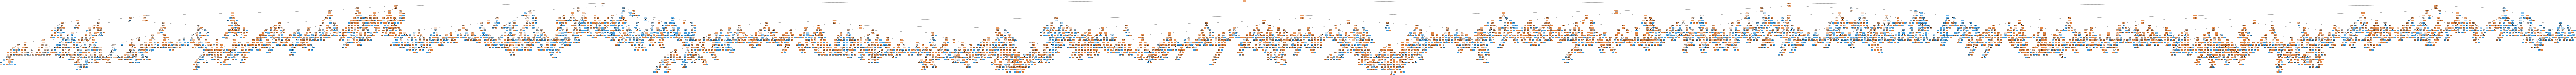

In [78]:
from sklearn.tree import export_graphviz
from graphviz import Digraph

estimator = modelRFC_o1.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = features_o.feature_names,
                #class_names = depVar_o.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=1200'])

#call 'dot' -Tpng 'tree.dot' -o 'tree.png'

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Analysis - The decision tree visualization is informative, but not very helpful. It does help illustrate the complexity of the model generated -- even the one that is probably the most intuitive. 

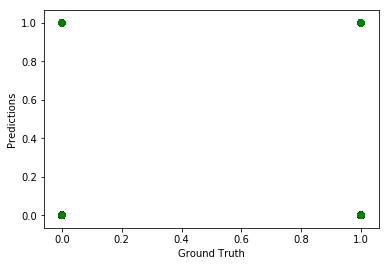

In [82]:
color_array = ['b'] * 4500 + ['g'] * 4500
plt.scatter(Y_test_o, predKNC_test_o1, c=color_array, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

### Analysis: Not effective

## Building Dataframe with Predictions for Graphing

In [178]:
model_pred = pd.DataFrame(predKNC_test_o1, columns=["Default"])

In [179]:
model_pred

Default
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           1
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
...       ...
8970        0
8971        0
8972        0
8973        0
8974        0
8975        0
8976        0
8977        0
8978        0
8979        0
8980        1
8981        0
8982        0
8983        0
8984        0
8985        0
8986        0
8987        0
8988        0
8989        0
8990        0
8991        0
8992        0
8993        0
8994        0
8995        0
8996        1
8997        0
8998        0
8999        0

[9000 rows x 1 columns]

In [180]:
Y_test_o_reindex = Y_test_o.reset_index()

In [181]:
Y_test_o_reindex.head()

index  default payment next month
0  28478                           1
1   3956                           0
2   7014                           0
3  18659                           0
4  15274                           1

In [182]:
Y_test_o_reindex.head()

index  default payment next month
0  28478                           1
1   3956                           0
2   7014                           0
3  18659                           0
4  15274                           1

In [183]:
X_test_o_reindex = X_test_o.reset_index()

In [184]:
X_test_o_reindex.head()

index  PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  PAY_AMT1  \
0  28478     -1     -1     -1     -1      0        326        652      2691   
1   3956      0      0      0      0      0      70591      89571     10000   
2   7014     -1     -1     -1      0     -1       2371       4926     40824   
3  18659      0      0      2      0      0      25561      27009      2134   
4  15274      0      0      0      0      0     116048     122345      4200   

   PAY_AMT2  ...  MALE  <25  <30  <35  <40  <50  <100K  <200K  <300K  <50K  
0       326  ...     0    0    0    0    1    0      0      1      0     0  
1      5000  ...     1    0    0    1    0    0      0      0      0     0  
2      2340  ...     0    0    0    0    0    1      0      1      0     0  
3      1000  ...     0    1    0    0    0    0      1      0      0     0  
4      4300  ...     0    0    1    0    0    0      0      1      0     0  

[5 rows x 33 columns]

In [197]:
graphing = pd.concat([Y_test_o_reindex, model_pred], axis=1)

In [198]:
graphing.head()

index  default payment next month  Default
0  28478                           1        0
1   3956                           0        0
2   7014                           0        0
3  18659                           0        0
4  15274                           1        0

In [199]:
graphing = pd.concat([X_test_o_reindex, graphing], axis=1)

In [200]:
#graphing['correct'] = graphing['default payment next month'].equals(graphing['Default'])

In [201]:
graphing.head()

index  PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  PAY_AMT1  \
0  28478     -1     -1     -1     -1      0        326        652      2691   
1   3956      0      0      0      0      0      70591      89571     10000   
2   7014     -1     -1     -1      0     -1       2371       4926     40824   
3  18659      0      0      2      0      0      25561      27009      2134   
4  15274      0      0      0      0      0     116048     122345      4200   

   PAY_AMT2  ...  <35  <40  <50  <100K  <200K  <300K  <50K  index  \
0       326  ...    0    1    0      0      1      0     0  28478   
1      5000  ...    1    0    0      0      0      0     0   3956   
2      2340  ...    0    0    1      0      1      0     0   7014   
3      1000  ...    0    0    0      1      0      0     0  18659   
4      4300  ...    0    0    0      0      1      0     0  15274   

   default payment next month  Default  
0                           1        0  
1                           0        0  
2                           0        0  
3                           0        0  
4                           1        0  

[5 rows x 36 columns]

In [207]:
graphing['correct'] = np.where((graphing['default payment next month'] == graphing['Default']),"True", "False")

In [203]:
graphing.head()

index  PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  PAY_AMT1  \
0  28478     -1     -1     -1     -1      0        326        652      2691   
1   3956      0      0      0      0      0      70591      89571     10000   
2   7014     -1     -1     -1      0     -1       2371       4926     40824   
3  18659      0      0      2      0      0      25561      27009      2134   
4  15274      0      0      0      0      0     116048     122345      4200   

   PAY_AMT2  ...  <40  <50  <100K  <200K  <300K  <50K  index  \
0       326  ...    1    0      0      1      0     0  28478   
1      5000  ...    0    0      0      0      0     0   3956   
2      2340  ...    0    1      0      1      0     0   7014   
3      1000  ...    0    0      1      0      0     0  18659   
4      4300  ...    0    0      0      1      0     0  15274   

   default payment next month  Default  correct  
0                           1        0    False  
1                           0        0     True  
2                           0        0     True  
3                           0        0     True  
4                           1        0    False  

[5 rows x 37 columns]

In [204]:
graphing = graphing.iloc[:,1:36]

In [205]:
graphing["key"] = graphing["index"]

In [206]:
graphing

PAY_1  PAY_2  PAY_3  PAY_4  PAY_6  BILL_AMT1  BILL_AMT5  PAY_AMT1  \
0        -1     -1     -1     -1      0        326        652      2691   
1         0      0      0      0      0      70591      89571     10000   
2        -1     -1     -1      0     -1       2371       4926     40824   
3         0      0      2      0      0      25561      27009      2134   
4         0      0      0      0      0     116048     122345      4200   
5         0      0      0      0     -2     104804          0      4988   
6         1      2      0      0      0      29221     143426        12   
7        -2     -1     -1     -1      0       4259      14998      1376   
8         1     -2     -2     -2     -2          0          0         0   
9         2      2      2      3      2      66852      71908      3000   
10        1     -2     -2     -2     -2          0          0         0   
11       -2     -2     -2     -2     -2       6890      19090     11002   
12       -1     -1     -1     -1     -1        220       1999      2755   
13        0      0      0      0      0      10430       7064     24030   
14        1     -1      0      0      0      14191       1952      5896   
15        2      2      2      2      2      33586      36808      1900   
16       -1     -1     -1     -2     -2       4280          0      2800   
17        0      0      0      0      0      46441      41367      1762   
18        0      0      0      0      0      37325      10000      2100   
19       -1      2     -1     -1     -1       4080          0         0   
20       -2     -2     -2     -2     -2       3745        576       745   
21        0      0      0      0      0      49235      21772      2517   
22        0      0      0      0      2      50060      33296      5000   
23        2      0      0      0     -2      28541          0      1385   
24        0      0      0      0      0     110766      41529      6000   
25        2      2      3      2      0      20091      22227      2000   
26        0      0      0      0      2      86422      90755      5000   
27        0      0      0     -1      0      74955      76345      4000   
28       -1     -1      2     -1     -1        264        264       528   
29        0      0      0      0      0      56970      24708      3000   
...     ...    ...    ...    ...    ...        ...        ...       ...   
8970      0      0      0      0      0      27232      26057      1439   
8971      0      0      0      0     -1      76015      21071      3008   
8972      1     -1     -1     -1     -1          0       3739      1216   
8973      0      0      0      0      0      38152      42028      2000   
8974     -2     -2     -2     -2     -2       2216       2280      2199   
8975      0      0      0      0      0      61118       9971      2200   
8976     -1     -1     -1     -1     -1       9514       4944     15046   
8977     -2     -2     -2     -2     -2        167        336       619   
8978      0      0      0      0      0     110032     114934      4028   
8979      0      0      0      0      0      81752      45302      3069   
8980      1      2      2      2      3      18253      23287      2900   
8981     -2     -2     -2     -2     -2       7174          0         0   
8982      1      2      2      3      2      45313      48980      2000   
8983      0      0      0      0      0     222976     221981      8494   
8984     -1     -1     -1     -1     -1      22000       1026      7772   
8985      0      0     -1     -1     -1       8585        150         0   
8986      0      0      0      0      0      57612      62743      2134   
8987      0      0      0      0      0      12770      23769      2500   
8988      0      0      0      0     -2      49093          0      2400   
8989     -2     -2     -2     -2     -2      52306       5803      3656   
8990      0      0      0      0      0      58949      63112      3000   
8991      1     -2     -2     -

In [209]:
pcf.reset_index(drop=True)

Unnamed: 0     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  \
0               0      1      20000    2          2         1   24      2   
1               1      2     120000    2          2         2   26     -1   
2               2      3      90000    2          2         2   34      0   
3               3      4      50000    2          2         1   37      0   
4               4      5      50000    1          2         1   57     -1   
5               5      6      50000    1          1         2   37      0   
6               6      7     500000    1          1         2   29      0   
7               7      8     100000    2          2         2   23      0   
8               8      9     140000    2          3         1   28      0   
9               9     10      20000    1          3         2   35     -2   
10             10     11     200000    2          3         2   34      0   
11             11     12     260000    2          1         2   51     -1   
12             12     13     630000    2          2         2   41     -1   
13             13     14      70000    1          2         2   30      1   
14             14     15     250000    1          1         2   29      0   
15             15     16      50000    2          3         3   23      1   
16             16     17      20000    1          1         2   24      0   
17             17     18     320000    1          1         1   49      0   
18             18     19     360000    2          1         1   49      1   
19             19     20     180000    2          1         2   29      1   
20             20     21     130000    2          3         2   39      0   
21             21     22     120000    2          2         1   39     -1   
22             22     23      70000    2          2         2   26      2   
23             23     24     450000    2          1         1   40     -2   
24             24     25      90000    1          1         2   23      0   
25             25     26      50000    1          3         2   23      0   
26             26     27      60000    1          1         2   27      1   
27             27     28      50000    2          3         2   30      0   
28             28     29      50000    2          3         1   47     -1   
29             29     30      50000    1          1         2   26      0   
...           ...    ...        ...  ...        ...       ...  ...    ...   
29970       29970  29971     360000    1          1         1   34     -1   
29971       29971  29972      80000    1          3         1   36      0   
29972       29972  29973     190000    1          1         1   37      0   
29973       29973  29974     230000    1          2         1   35      1   
29974       29974  29975      50000    1          2         1   37      1   
29975       29975  29976     220000    1          2         1   41      0   
29976       29976  29977      40000    1          2         2   47      2   
29977       29977  29978     420000    1          1         2   34      0   
29978       29978  29979     310000    1          2         1   39      0   
29979       29979  29980     180000    1          1         1   32     -2   
29980       29980  29981      50000    1          3         2   42      0   
29981       29981  29982      50000    1          2         1   44      1   
29982       29982  29983      90000    1          2         1   36      0   
29983       29983  29984      20000    1          2         1   44     -2   
29984       29984  29985      30000    1          2         2   38     -1   
29985       29985  29986     240000    1          1         2   30     -2   
29986       29986  29987     360000    1          1         2   35     -1   
29987       29987  29988     130000    1          1         2   34      0   
29988       29988  29989     250000    1          1         1   34      0   
29989       29989  29990     150000    1          1         2   35     -1   
299

In [166]:
pcf["key"] = pcf["Unnamed: 0"]

In [210]:
pcf.head()

Unnamed: 0  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0           0   1      20000    2          2         1   24      2      2   
1           1   2     120000    2          2         2   26     -1      2   
2           2   3      90000    2          2         2   34      0      0   
3           3   4      50000    2          2         1   37      0      0   
4           4   5      50000    1          2         1   57     -1      0   

   PAY_3  ...  PAY_6MO_PCT_LIM  LIMIT_PER_AGE  BILL1_PCT_LIM  EDU_BUCK  \
0     -1  ...             0.03          833.0           0.20      UNIV   
1      0  ...             0.04         4615.0           0.02      UNIV   
2      0  ...             0.12         2647.0           0.32      UNIV   
3      0  ...             0.17         1351.0           0.94      UNIV   
4     -1  ...             1.18          877.0           0.17      UNIV   

   SEX_BUCK  MAR_BUCK  def_word  AGE_BUCK  LIMIT_BAL_BUCK  key  
0      FEML      MARR   DEFAULT       <25            <50K    0  
1      FEML      SING   DEFAULT       <30           <200K    1  
2      FEML      SING      PAID       <35           <100K    2  
3      FEML      MARR      PAID       <40           <100K    3  
4      MALE      MARR      PAID       50+           <100K    4  

[5 rows x 42 columns]

In [211]:
graphing2 = pd.merge(graphing, pcf, how='left', on=["key"])

In [212]:
graphing2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 78 columns):
PAY_1_x                         9000 non-null int64
PAY_2_x                         9000 non-null int64
PAY_3_x                         9000 non-null int64
PAY_4_x                         9000 non-null int64
PAY_6_x                         9000 non-null int64
BILL_AMT1_x                     9000 non-null int64
BILL_AMT5_x                     9000 non-null int64
PAY_AMT1_x                      9000 non-null int64
PAY_AMT2_x                      9000 non-null int64
PAY_AMT3_x                      9000 non-null int64
PAY_AMT4_x                      9000 non-null int64
PAY_AMT5_x                      9000 non-null int64
PAY_AMT6_x                      9000 non-null int64
BILL_PCT_1_x                    9000 non-null float64
BILL_PCT_5_x                    9000 non-null float64
PAY_6MO_PCT_LIM_x               9000 non-null float64
MARR                            9000 non-null uint8
OTH

In [220]:
graphing2['correct'].value_counts()

True     7076
False    1924
Name: correct, dtype: int64

In [221]:
graphing2.sort_values('correct', ascending=False).head()

PAY_1_x  PAY_2_x  PAY_3_x  PAY_4_x  PAY_6_x  BILL_AMT1_x  BILL_AMT5_x  \
4500        0        0        0        0        0        48591        28248   
5627        0        0        0        0       -1        50254         1307   
5645       -1        0        0        0       -1        31065         5676   
5643        0        0        0        0        0         8780         4001   
5642       -1       -1       -1       -1        0         1692        42857   

      PAY_AMT1_x  PAY_AMT2_x  PAY_AMT3_x  ...  BILL_PCT_6  PAY_6MO_PCT_LIM_y  \
4500        2300        2000        1432  ...        0.57               0.20   
5627        2000        3000        3000  ...        0.01               0.05   
5645        2004        3000        1041  ...        0.32               0.36   
5643        1100        1300        1200  ...        0.51               0.51   
5642        2702        1246         397  ...        0.52               0.59   

      LIMIT_PER_AGE  BILL1_PCT_LIM  EDU_BUCK  SEX_BUCK  MAR_BUCK  def_word  \
4500         1786.0           0.97      UNIV      MALE      SING      PAID   
5627         6316.0           0.21      UNIV      FEML      SING      PAID   
5645        13548.0           0.07      GRAD      MALE      SING      PAID   
5643          455.0           0.88      UNIV      MALE      SING      PAID   
5642         2286.0           0.02      UNIV      MALE      MARR      PAID   

      AGE_BUCK  LIMIT_BAL_BUCK  
4500       <30           <100K  
5627       <40           <300K  
5645       <35           300K+  
5643       <25            <50K  
5642       <40           <100K  

[5 rows x 78 columns]

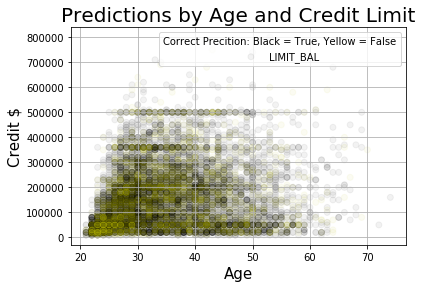

In [239]:
x = graphing2['AGE']
y = graphing2['LIMIT_BAL']
color_array = ['k'] * 7076 + ['y'] * 1924 
#default = graphing2['correct']

fig, ax = plt.subplots()
ax.scatter(x, y, c=color_array,alpha = .05)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Credit $", fontsize = 15)
ax.set_title("Predictions by Age and Credit Limit", fontsize = 20)

ax.legend(title="Correct Precition: Black = True, Yellow = False")

ax.grid(True)
plt.show()

### Analysis - Visualization is getting close, but still not ideal. It's hard to get the full picture - one color is stacked on another, which makes it seem like there are either no forecast misses or they are mostly misses.